# OTUS RL HW1. Релизация Q-learning на примере среду Taxi-v3 (Gymnasium)

In [1]:
from tqdm import tqdm
import random
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
# для визуализации
import imageio.v2 as imageio
from IPython.display import Image, display

In [2]:
SEED = 42

In [3]:
class QLearningAgent:
    def __init__(self, env_name="Taxi-v3", alpha=0.1, gamma=0.99, epsilon=0.1, n_episodes=10000):
        # Инициализация параметров и среды
        self.env_name = env_name
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_episodes = n_episodes

        self.env = gym.make(self.env_name, render_mode="rgb_array")

        # Инициализация Q-таблицы
        self.Q = np.zeros([self.env.observation_space.n, self.env.action_space.n])

        # Хранение награды и средней награды
        self.rewards_per_episode = []
        # self.avg_reward = []
        self.avg_reward = float()

    # Функция для выбора действия (ε-жадная стратегия)
    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()  # случайное действие
        else:
            return np.argmax(self.Q[state])  # действие с максимальным Q-значением

    # Основная функция для тренировки агента
    def train(self):
        for episode in tqdm(range(self.n_episodes)):
            state, info = self.env.reset()  # В Gymnasium возвращается кортеж (state, info)
            done = False
            total_reward = 0

            while not done:
                action = self.choose_action(state)
                next_state, reward, done, truncated, info = self.env.step(action)

                # Обновление Q-таблицы по формуле Q-learning
                self.Q[state, action] = self.Q[state, action] + self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[state, action])

                state = next_state
                total_reward += reward

            # Сохраняем награду за эпизод
            self.rewards_per_episode.append(total_reward)

            # Обновляем среднюю награду за последние 100 эпизодов
            if episode >= 99: # начиная с 100-го, эпизоды нумеруются с 0
                self.avg_reward = np.mean(self.rewards_per_episode[-100:])

    # Сохранение обученной модели
    def save_model(self, filename="q_table.npy"):
        np.save(filename, self.Q)

    # Построение графиков
    def plot_results(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.rewards_per_episode, label="Награда за эпизод", alpha=0.4)
        plt.plot(self.avg_reward, label="Средняя награда (последние 100 эпизодов)", linewidth=2)
        plt.xlabel("Эпизоды")
        plt.ylabel("Награда")
        plt.title(f"Q-learning {self.env_name}, {self.n_episodes} episodes, alpha={self.alpha}, gamma={self.gamma}, eps={self.epsilon}, last 100 episodes avg reward={self.avg_reward}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def make_gif(self, duration=100, gif_path='episode.gif'):
        # Гифка с инференсом (как визуально работает модель)
        frames = []
        state, _ = self.env.reset()

        for _ in range(duration):
            action = np.argmax(self.Q[state])
            frame = self.env.render()  # Получаем изображение (rgb_array)
            frames.append(frame)  # Добавляем кадр

            state, _, terminated, truncated, _ = self.env.step(action)
            if terminated or truncated:
                break

        self.env.close()  # Закрываем среду

        # Сохраняем gif с анимацией
        imageio.mimsave(gif_path, frames, fps=10)
        display(Image(filename=gif_path))  # Отображаем gif


100%|██████████| 100/100 [00:01<00:00, 64.26it/s]


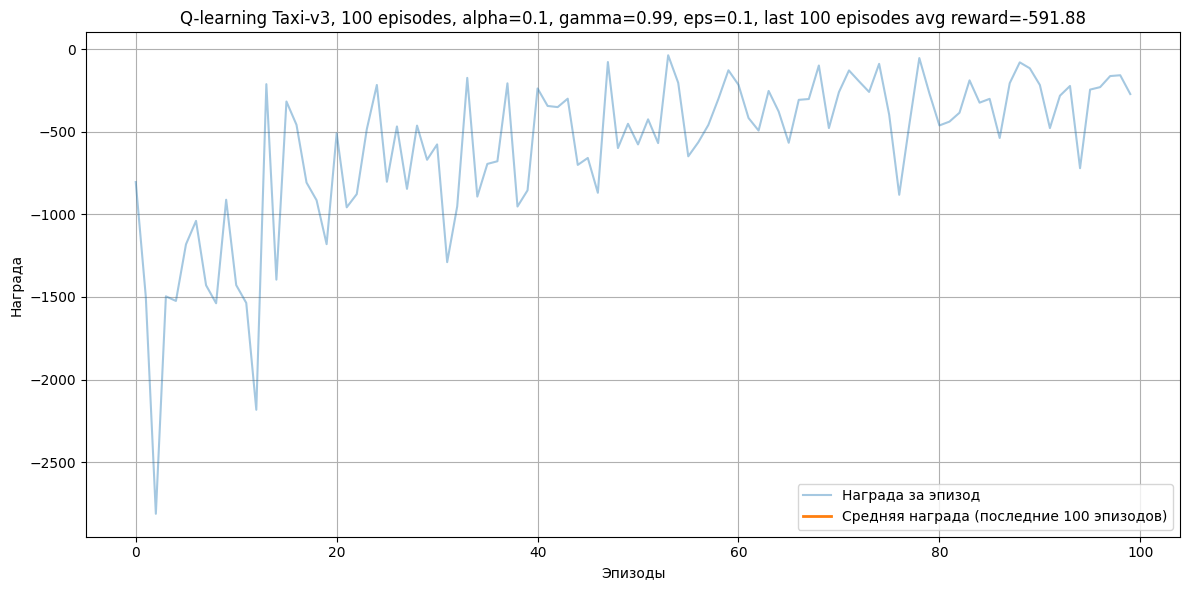

In [4]:
random.seed(SEED)
np.random.seed(SEED)

agent = QLearningAgent(env_name="Taxi-v3", alpha=0.1, gamma=0.99, epsilon=0.1, n_episodes=100)
agent.train()  # Тренируем агента
agent.save_model("q_table_taxi.npy")  # Сохраняем модель
agent.plot_results()  # Строим график

100%|██████████| 500/500 [00:06<00:00, 77.44it/s] 


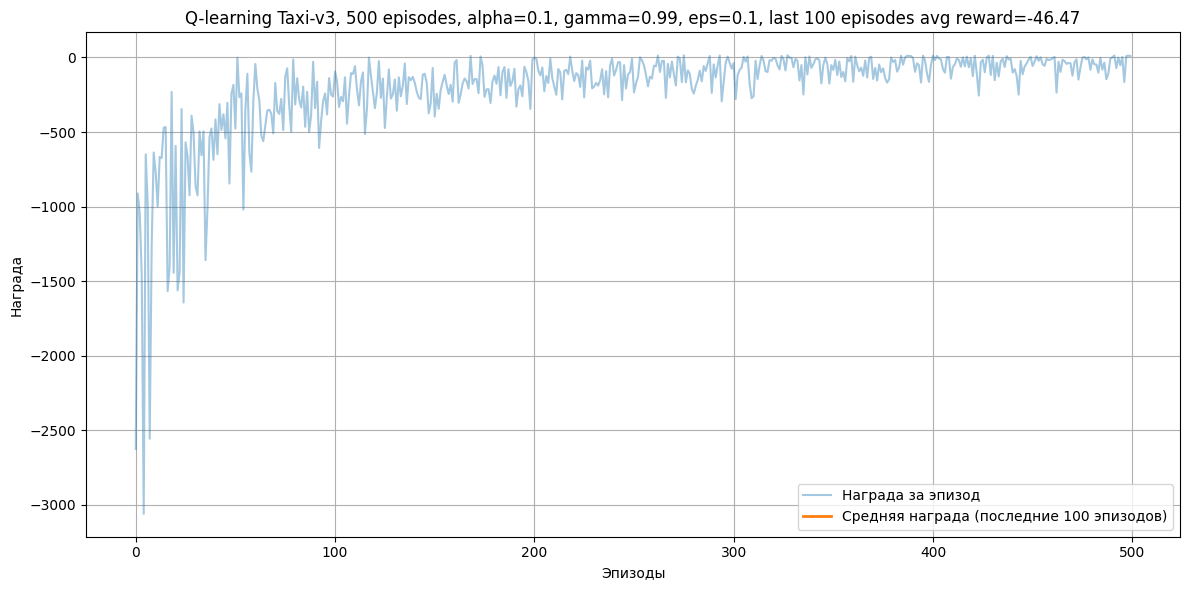

In [5]:
random.seed(SEED)
np.random.seed(SEED)

agent = QLearningAgent(env_name="Taxi-v3", alpha=0.1, gamma=0.99, epsilon=0.1, n_episodes=500)
agent.train()  # Тренируем агента
agent.save_model("q_table_taxi.npy")  # Сохраняем модель
agent.plot_results()  # Строим график

100%|██████████| 2000/2000 [00:03<00:00, 544.51it/s] 


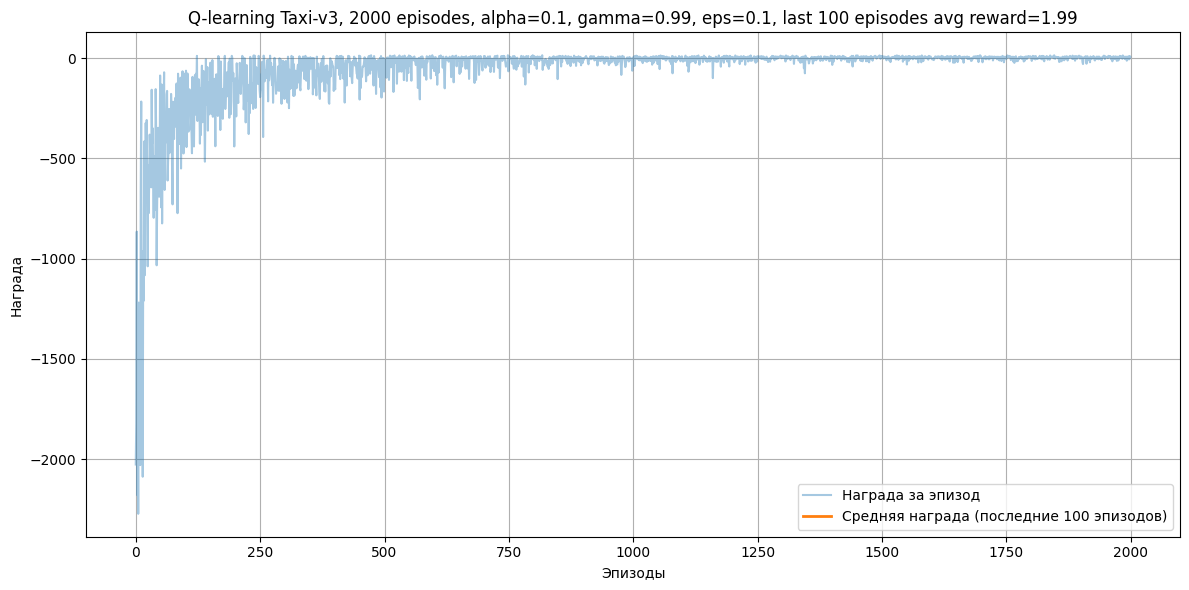

In [6]:
random.seed(SEED)
np.random.seed(SEED)

agent = QLearningAgent(env_name="Taxi-v3", alpha=0.1, gamma=0.99, epsilon=0.1, n_episodes=2000)
agent.train()  # Тренируем агента
agent.save_model("q_table_taxi.npy")  # Сохраняем модель
agent.plot_results()  # Строим график

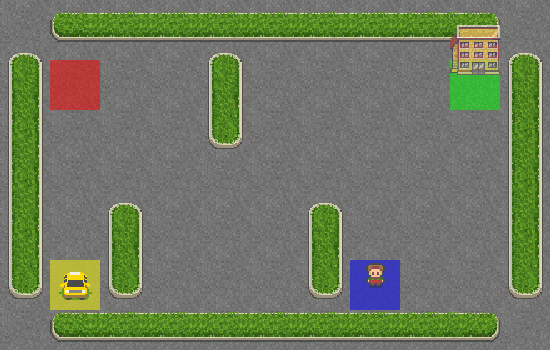

In [7]:
agent.make_gif()